In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Model

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
import matplotlib.pyplot as plt

In [4]:
x_train.shape

(60000, 28, 28)

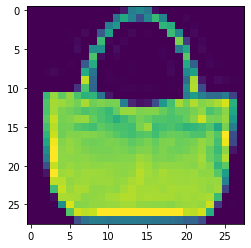

In [8]:
plt.imshow(x_train[100])

In [6]:
target_names = ["T-Shirt", "Trouser", "Pull Over", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [9]:
y_train[100]

8

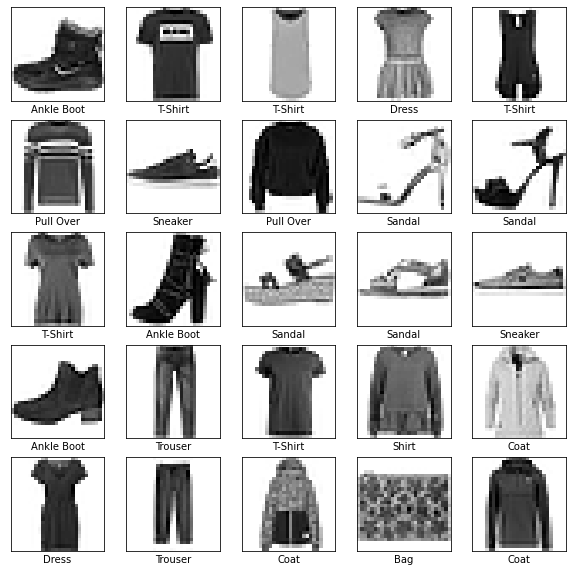

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(target_names[y_train[i]])
plt.show()

In [12]:
# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
BUFFER_SIZE = 10000
BATCH_SIZE = 32

train_df = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_df = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [17]:
train_df

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.uint8, name=None))>

In [20]:
class MyModel(Model):
    def __init__(self):
        # calling constructor of parent Class (Model)
        super(MyModel, self).__init__()
        # first layer is convolutional layer
        self.conv_1 = Conv2D(32, 3, activation="relu")
        # then apply pooling layer
        self.pool = MaxPooling2D(pool_size=(2,2))
        # then apply flatten
        self.flatten = Flatten()
        # now apply ANN
        self.h1 = Dense(128, activation='relu')
        self.h2 = Dense(64, activation='relu')
        # last layer is output layer
        self.output_layer = Dense(10, activation='softmax')
    
    def call(self, data):
        x = self.conv_1(data)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.h1(x)
        x = self.h1(x)
        x = self.output_layer(x)
        return x
    

In [21]:
model = MyModel()

In [22]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [23]:
train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='train_acc')
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name='test_acc')

train_loss = tf.keras.metrics.Mean(name = 'train_loss')
test_loss = tf.keras.metrics.Mean(name = 'test_loss')